#  Loan Defaulter Prediction 

## Supervised Learning Hands-on session

# Loading Dataset using pandas

In [1]:
#importing the necessary libraries
#for handling dataset
import pandas as pd

#additional array-based functionality
import numpy as np

#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#for manipulating dates and times
import datetime as dt

#for suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset into memory from secondary memory to primary memory
data = pd.read_csv("LoanStats Dataset_30052021.csv", encoding="Latin-1", low_memory=False)

print("Dataset loaded in memory...")

#set the maximum column display limit to 50
pd.set_option('display.max_columns', 50)

Dataset loaded in memory...


In [3]:
#Checking the number of rows and columns in the dataframe
data.shape

(36396, 41)

# Row display operations

In [4]:
#displaying profiles of any given index
i=0
print("Details of "+str(i)+"th profile from the dataset :\n\nAttributes\n")
print(data.iloc[i])

Details of 0th profile from the dataset :

Attributes

Loan ID                                                                                87023
Amount Requested                                                                        7500
Amount Funded By Investors                                                              7500
Interest Rate                                                                         13.75%
Loan Length                                                                        36 months
Application Date                                                                  2007-06-07
Application Expiration Date                                                       2007-06-21
Issued Date                                                                       2007-06-27
CREDIT Grade                                                                              E2
Loan Title                                                                Consolidation Loan
Loan Purpose   

In [5]:
#display first 5 records 

print("Display the starting 5 profiles from the dataset :")
data.head()

Display the starting 5 profiles from the dataset :


,Loan ID,Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Application Date,Application Expiration Date,Issued Date,CREDIT Grade,Loan Title,Loan Purpose,Loan Description,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal Funded by Investors,Payments To Date (Funded by investors),Remaining Principal,Payments To Date,Screen Name,City,State,Home Ownership,Monthly Income,FICO Range,Earliest CREDIT Line,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquent Amount,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Education,Employment Length,Code
0,87023,7500.0,7500.0,13.75%,36 months,2007-06-07,2007-06-21,2007-06-27,E2,Consolidation Loan,debt_consolidation,"I plan to consolidate over $7,000 of debt: a c...",255.43,Fully Paid,7500.0,14.29%,0.0,9194.98,0.0,9194.98,Kingtrite,Attleboro,MA,OWN,1833.33,660-678,2003-10-27,7.0,8.0,4175.0,51.5%,0.0,0.0,0.0,1.0,11.0,0.0,0.0,NaN,< 1 year,NaN
1,90376,5000.0,5000.0,7.43%,36 months,2007-06-12,2007-06-26,2007-07-02,A2,JAL Loan,other,NaN,155.38,Fully Paid,5000.0,3.72%,0.0,5174.16,0.0,5174.16,Laguna,Rockville,MD,MORTGAGE,16666.67,780+,1988-11-19,17.0,26.0,85607.0,0.7%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN
2,90395,5000.0,5000.0,8.07%,36 months,2007-06-12,2007-06-26,2007-07-02,A4,MBA Loan Consolidation,debt_consolidation,NaN,156.84,Fully Paid,5000.0,2.3%,0.0,5272.08,0.0,5272.08,MGDesousa,Framingham,MA,MORTGAGE,8333.33,714-749,1998-10-28,11.0,20.0,9698.0,19.4%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN
3,90665,8500.0,8500.0,10.28%,36 months,2007-06-13,2007-06-27,2007-07-03,C1,Retiring credit card debt,credit_card,The rate of interest and fees incurred by carr...,275.38,Fully Paid,8500.0,6.4%,0.0,9912.49,0.0,9912.49,Radiothermal,Greensboro,NC,RENT,1500.00,679-713,1986-12-30,6.0,9.0,8847.0,26.9%,1.0,0.0,0.0,1.0,5.0,0.0,0.0,NaN,3 years,NaN
4,92187,2500.0,2500.0,8.07%,36 months,2007-06-15,2007-06-29,2007-07-05,A4,Home Improvement,home_improvement,Our current gutter system on our home is old a...,78.42,Fully Paid,2500.0,11.33%,0.0,2822.72,0.0,2822.72,PMJ7671,Lakewood,CO,MORTGAGE,9166.67,750-779,1990-11-11,13.0,40.0,7274.0,13.1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4 years,NaN


In [6]:
#display selected rows from the dataset according to a given condition
print("Selecting particular rows from the dataset : ")
data.loc[(data['Amount Requested'] > 7000)].head(3)
# data.loc[(data['CREDIT Grade'] == 'A2') | (data['CREDIT Grade'] == 'B2')].head(3)

Selecting particular rows from the dataset : 


,Loan ID,Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Application Date,Application Expiration Date,Issued Date,CREDIT Grade,Loan Title,Loan Purpose,Loan Description,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal Funded by Investors,Payments To Date (Funded by investors),Remaining Principal,Payments To Date,Screen Name,City,State,Home Ownership,Monthly Income,FICO Range,Earliest CREDIT Line,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquent Amount,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Education,Employment Length,Code
0,87023,7500.0,7500.0,13.75%,36 months,2007-06-07,2007-06-21,2007-06-27,E2,Consolidation Loan,debt_consolidation,"I plan to consolidate over $7,000 of debt: a c...",255.43,Fully Paid,7500.0,14.29%,0.0,9194.98,0.0,9194.98,Kingtrite,Attleboro,MA,OWN,1833.33,660-678,2003-10-27,7.0,8.0,4175.0,51.5%,0.0,0.0,0.0,1.0,11.0,0.0,0.0,NaN,< 1 year,NaN
3,90665,8500.0,8500.0,10.28%,36 months,2007-06-13,2007-06-27,2007-07-03,C1,Retiring credit card debt,credit_card,The rate of interest and fees incurred by carr...,275.38,Fully Paid,8500.0,6.4%,0.0,9912.49,0.0,9912.49,Radiothermal,Greensboro,NC,RENT,1500.00,679-713,1986-12-30,6.0,9.0,8847.0,26.9%,1.0,0.0,0.0,1.0,5.0,0.0,0.0,NaN,3 years,NaN
19,101579,10000.0,10000.0,10.28%,36 months,2007-06-27,2007-07-11,2007-07-17,C1,Web Design Business Expansion Loan,small_business,Seven months ago I decided to drop everything ...,323.98,Fully Paid,10000.0,10.7%,0.0,11662.13,0.0,11662.13,WebDev,Fort Collins,CO,RENT,2281.33,679-713,2003-09-17,4.0,4.0,3534.0,54.4%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN


In [7]:
# printing information about the DataFrame including the name of columns,their dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36396 entries, 0 to 36395
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Loan ID                                  36396 non-null  object 
 1   Amount Requested                         36395 non-null  float64
 2   Amount Funded By Investors               36395 non-null  float64
 3   Interest Rate                            36395 non-null  object 
 4   Loan Length                              36395 non-null  object 
 5   Application Date                         36395 non-null  object 
 6   Application Expiration Date              36395 non-null  object 
 7   Issued Date                              36219 non-null  object 
 8   CREDIT Grade                             36395 non-null  object 
 9   Loan Title                               36382 non-null  object 
 10  Loan Purpose                             36395

# Selecting the required rows

## Transforming "Status" values

In [8]:
#Display the unique values in the attribute of Loan status

print("Display unique values from the attribute \"Status\":\n")
i=1
for item in data.Status.unique():
    print(i,item)
    i+=1

Display unique values from the attribute "Status":

1 Fully Paid
2 Charged Off
3 Late (31-120 days)
4 Performing Payment Plan
5 Default
6 In Grace Period
7 Current
8 Late (16-30 days)
9 Issued
10 In Review
11 nan
12 Does not meet the current credit policy  Status: Fully Paid
13 Does not meet the current credit policy  Status: Performing Payment Plan
14 Does not meet the current credit policy  Status: Charged Off
15 Does not meet the current credit policy  Status: Late (31-120 days)
16 Does not meet the current credit policy  Status: In Grace Period
17 Does not meet the current credit policy  Status: Late (16-30 days)
18 Does not meet the current credit policy  Status: Current
19 Does not meet the current credit policy  Status: Default


In [9]:
#remove all other records except the  'Fully paid', 'Charged off', 'Late (31-120 days), 'Default', 'In Grace Period' and  'Current' records
data_with_loanstatus_sliced = data[(data['Status']=="Fully Paid") | (data['Status']=="Charged Off") |
                                   (data['Status']=='Does not meet the current credit policy  Status: Fully Paid') | (data['Status']=='Does not meet the current credit policy  Status: Charged Off') | (data['Status']=="Late (31-120 days)") | 
                                   (data['Status']=="Default") | (data['Status']=="In Grace Period") | (data['Status']=="Current")| (data['Status']=="Issued")| (data['Status']=="Does not meet the current credit policy  Status: Current")|
                                   (data['Status']=="Does not meet the current credit policy  Status: Late (31-120 days)")| (data['Status']=="Does not meet the current credit policy  Status: In Grace Period")|(data['Status']=="Does not meet the current credit policy  Status: Default")]

# map the class values to integers
#map Fully paid class value to 0, Current class value to 1 , Late (31-120 days) class value to 2, In Grace Period class value to 3, Default class value to 4 and Charged off class value to 5,
di = {"Fully Paid":0, "Charged Off":5, 'Does not meet the current credit policy  Status: Fully Paid':0, 'Does not meet the current credit policy  Status: Charged Off':5, 'Late (31-120 days)':2, 'Default': 4, 'In Grace Period':3, 'Current':1,'Issued':6, 'Does not meet the current credit policy  Status: Current':1, 'Does not meet the current credit policy  Status: Late (31-120 days)':2,'Does not meet the current credit policy  Status: In Grace Period':3,'Does not meet the current credit policy  Status: Default':4} 
data= data_with_loanstatus_sliced.replace({"Status": di})

In [10]:
#print the new unique values of the attribute

print("Unique values in \"Status\" attibute : \n",data['Status'].value_counts())

print("\nCurrent shape of dataset :",data.shape)

Unique values in "Status" attibute : 
 1    25345
0     5684
6     2534
5     1604
2      421
3      242
4       39
Name: Status, dtype: int64

Current shape of dataset : (35869, 41)


In [11]:
# Printing the status values in the dataframe
print("Values of the status column :")
print(data['Status'])

Values of the status column :
0        0
1        0
2        0
3        0
4        0
        ..
36391    1
36392    1
36393    1
36394    1
36395    1
Name: Status, Length: 35869, dtype: int64


# The float64 type attributes

## Attributes with no changes required

In [12]:
# printing the values of the attribute 'Amount Funded By Investors'
print("Sample values in the attribute - Amount Funded By Investors\n")
print(data['Amount Funded By Investors'])

Sample values in the attribute - Amount Funded By Investors

0        7500.0
1        5000.0
2        5000.0
3        8500.0
4        2500.0
          ...  
36391    2500.0
36392    5000.0
36393    3500.0
36394    2925.0
36395    2950.0
Name: Amount Funded By Investors, Length: 35869, dtype: float64


In [13]:
#all the float64 type of attributes

print("Monthly PAYMENT : ", end='')
print(data['Monthly PAYMENT'].dtype)

print("Monthly Income : ", end='')
print(data['Monthly Income'].dtype)

print("Open CREDIT Lines : ", end='')
print(data['Open CREDIT Lines'].dtype)

print("Total CREDIT Lines : ", end='')
print(data['Total CREDIT Lines'].dtype)

print("Revolving CREDIT Balance : ", end='')
print(data['Revolving CREDIT Balance'].dtype)

print("Inquiries in the Last 6 Months : ", end='')
print(data['Inquiries in the Last 6 Months'].dtype)

print("Delinquencies (Last 2 yrs) : ", end='')
print(data['Delinquencies (Last 2 yrs)'].dtype)

print("Public Records On File : ", end='')
print(data['Public Records On File'].dtype)

print("Months Since Last Record : ", end='')
print(data['Months Since Last Record'].dtype)

print("Amount Requested : ", end='')
print(data['Amount Requested'].dtype)

print("Total Amount Funded :", end='')
print(data['Total Amount Funded'].dtype)

print("Remaining Principal Funded by Investors :", end='')
print(data['Remaining Principal Funded by Investors'].dtype)

print("Payments To Date (Funded by investors) :", end='')
print(data['Payments To Date (Funded by investors)'].dtype)

print("Remaining Principal :", end='')
print(data['Remaining Principal '].dtype)

print("Payments To Date :", end='')
print(data[' Payments To Date'].dtype)

print("Accounts Now Delinquent :", end='')
print(data['Accounts Now Delinquent'].dtype)

print("Delinquent Amount :", end='')
print(data['Delinquent Amount'].dtype)

print("Months Since Last Delinquency :", end='')
print(data['Months Since Last Delinquency'].dtype)

Monthly PAYMENT : float64
Monthly Income : float64
Open CREDIT Lines : float64
Total CREDIT Lines : float64
Revolving CREDIT Balance : float64
Inquiries in the Last 6 Months : float64
Delinquencies (Last 2 yrs) : float64
Public Records On File : float64
Months Since Last Record : float64
Amount Requested : float64
Total Amount Funded :float64
Remaining Principal Funded by Investors :float64
Payments To Date (Funded by investors) :float64
Remaining Principal :float64
Payments To Date :float64
Accounts Now Delinquent :float64
Delinquent Amount :float64
Months Since Last Delinquency :float64


# Date type attributes

## converting date to numerical values

In [14]:
#display samples of the "Earliest CREDIT Line" attribute

print("Sample values in the attribute - Earliest CREDIT Line\n")

print(data['Earliest CREDIT Line'])

Sample values in the attribute - Earliest CREDIT Line

0        2003-10-27
1        1988-11-19
2        1998-10-28
3        1986-12-30
4        1990-11-11
            ...    
36391    2002-12-10
36392    2005-10-25
36393    1990-02-17
36394    1992-12-03
36395    2001-05-20
Name: Earliest CREDIT Line, Length: 35869, dtype: object


In [15]:
#converting "Earliest CREDIT Line" attribute to  Python Date time object
data['Earliest CREDIT Line'] = pd.to_datetime(data['Earliest CREDIT Line'])

In [16]:
# Checking if there is any null value present in the column 'Earliest CREDIT Line'
data['Earliest CREDIT Line'].isna().any()

True

In [17]:
#Finding median of day, month and year
dd=int(data['Earliest CREDIT Line'].dt.day.median())
mm=int(data['Earliest CREDIT Line'].dt.month.median())
yy=int(data['Earliest CREDIT Line'].dt.year.median())

In [18]:
#Printing median of day, month and year
print('Median of day is : ', dd)
print('Median of month is : ', mm)
print('Median of year is : ', yy)

Median of day is :  16
Median of month is :  7
Median of year is :  1998


In [19]:
#combining the median of day, month and year to a median date
d = dt.datetime(yy,mm,dd)
date = d.date()

In [20]:
# printing the median date
print('Median date is : ',date)

Median date is :  1998-07-16


In [21]:
#replacing null values with median date
data['Earliest CREDIT Line'] = data['Earliest CREDIT Line'].fillna(date)

In [22]:
# Again checking if there is any null value present in the column 'Earliest CREDIT Line'
data['Earliest CREDIT Line'].isna().any()

False

In [23]:
#conversion of other date-type of attributes
#replacing null values with median

data['Application Date'] = pd.to_datetime(data['Application Date'])
dd=int(data['Application Date'].dt.day.median())
mm=int(data['Application Date'].dt.month.median())
yy=int(data['Application Date'].dt.year.median())
d = dt.datetime(yy,mm,dd)
date = d.date()
data['Application Date'] = data['Application Date'].fillna(date)


data['Application Expiration Date'] = pd.to_datetime(data['Application Expiration Date'])
dd=int(data['Application Expiration Date'].dt.day.median())
mm=int(data['Application Expiration Date'].dt.month.median())
yy=int(data['Application Expiration Date'].dt.year.median())
d = dt.datetime(yy,mm,dd)
date = d.date()
data['Application Expiration Date'] = data['Application Expiration Date'].fillna(date)


data['Issued Date'] = pd.to_datetime(data['Issued Date'])
dd=int(data['Issued Date'].dt.day.median())
mm=int(data['Issued Date'].dt.month.median())
yy=int(data['Issued Date'].dt.year.median())
d = dt.datetime(yy,mm,dd)
date = d.date()
data['Issued Date'] = data['Issued Date'].fillna(date)

# Percentage attributes

## converting string values to numeric values

In [24]:
#display sample values from the attribute - interest rate

print("Sample values in the attribute - Interest Rate\n")
print(data['Interest Rate'])

Sample values in the attribute - Interest Rate

0        13.75%
1         7.43%
2         8.07%
3        10.28%
4         8.07%
          ...  
36391    14.83%
36392    15.20%
36393    15.57%
36394    19.66%
36395    15.95%
Name: Interest Rate, Length: 35869, dtype: object


In [25]:
#remove the '%' character from the string values of the attribute
data['Interest Rate'] = data['Interest Rate'].replace({'%':''}, regex = True)

#convert the attribute values to float
data['Interest Rate'] = data['Interest Rate'].apply(lambda x:float(x))

#display the new values of attribute
print("Sample values in the attribute - Interest Rate, after processing\n")
print(data['Interest Rate'])

Sample values in the attribute - Interest Rate, after processing

0        13.75
1         7.43
2         8.07
3        10.28
4         8.07
         ...  
36391    14.83
36392    15.20
36393    15.57
36394    19.66
36395    15.95
Name: Interest Rate, Length: 35869, dtype: float64


In [26]:
#processing of similar attributes with % at the end of the values

data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].replace({'%':''}, regex = True)
data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].apply(lambda x:float(x))

data['Revolving Line Utilization'] = data['Revolving Line Utilization'].replace({'%':''}, regex = True)
data['Revolving Line Utilization'] = data['Revolving Line Utilization'].apply(lambda x:float(x))

# Attributes with redundant information

## removing the ' months' part from the values

In [27]:
#display sample values from the attribute
print("Sample values in the attribute - Loan Length\n")
print(data['Loan Length'])

Sample values in the attribute - Loan Length

0        36 months
1        36 months
2        36 months
3        36 months
4        36 months
           ...    
36391    60 months
36392    36 months
36393    60 months
36394    60 months
36395    60 months
Name: Loan Length, Length: 35869, dtype: object


In [28]:
#remove the ' month' part from the string values
data['Loan Length'] = data['Loan Length'].replace({' months':''}, regex = True)

#convert the strings into integer type
data['Loan Length'] = data['Loan Length'].apply(lambda x:int(x))

#display the processed values
print("Sample values in the attribute - Loan Length, after processing\n")
print(data['Loan Length'])

Sample values in the attribute - Loan Length, after processing

0        36
1        36
2        36
3        36
4        36
         ..
36391    60
36392    36
36393    60
36394    60
36395    60
Name: Loan Length, Length: 35869, dtype: int64


# Categorical Attributes

## mapping to class numbers

In [29]:
#rename the attribute
data.rename(columns = {'CREDIT Grade':'CREDIT_Grade'}, inplace = True)
print(data.CREDIT_Grade.unique())

['E2' 'A2' 'A4' 'C1' 'B1' 'C4' 'B5' 'B3' 'A5' 'A3' 'B2' 'C2' 'F4' 'C5'
 'E1' 'D3' 'B4' 'D1' 'F1' 'D4' 'C3' 'D2' 'F2' 'A1' 'E4' 'F3' 'E5' 'D5'
 'E3' 'G5' 'F5' 'G4' 'G3' 'G2' 'G1']


In [30]:
#display sample values of the attribute
print("Sample values in the attribute - CREDIT_Grade\n")
print(data['CREDIT_Grade'])

Sample values in the attribute - CREDIT_Grade

0        E2
1        A2
2        A4
3        C1
4        A4
         ..
36391    D3
36392    D4
36393    D5
36394    G1
36395    E1
Name: CREDIT_Grade, Length: 35869, dtype: object


In [31]:
#renaming the attribute
data.rename(columns = {'Home Ownership':'Home_Ownership'}, inplace = True)
print("Display unique values of the attribute : Home_Ownership")
print(data.Home_Ownership.unique())

Display unique values of the attribute : Home_Ownership
['OWN' 'MORTGAGE' 'RENT' 'NONE' 'ANY']


In [32]:
#rename the attribute
data.rename(columns = {'FICO Range':'FICO_Range'}, inplace = True)

#print unique values of the attribute
print("Display unique values of the attribute : FICO_Range")
print(data.FICO_Range.unique())

Display unique values of the attribute : FICO_Range
['660-678' '780+' '714-749' '679-713' '750-779' nan '640-659']


In [33]:
#map the categories of the attributes to numbers
data["FICO_Range"] = data["FICO_Range"].map({"640-659":6,"660-678":5,"679-713":4,"714-749":3,"750-779":2,"780+":1})

#print the unique values after mapping
print("Display unique values of the attribute : FICO_Range after mapping :")
print(data.FICO_Range.unique())

#replace the nan values with 3
data['FICO_Range'] = data['FICO_Range'].fillna(3)

#display the processed values
print("\n\nDisplay unique values of the attribute : FICO_Range after filling nan")
print(data.FICO_Range.unique())

Display unique values of the attribute : FICO_Range after mapping :
[ 5.  1.  3.  4.  2. nan  6.]


Display unique values of the attribute : FICO_Range after filling nan
[5. 1. 3. 4. 2. 6.]


In [34]:
#display unique values of the education attribute
print("Display unique values of the attribute : Education\n")
for item in data.Education.unique()[:5]:
    print(item)

Display unique values of the attribute : Education

nan
Youngstown State University
University of Connecticut
Rochester Institute of Technology (RIT)
Penn State-University Park


In [35]:
#replace the nan values with 0
data['Education'] = data['Education'].fillna(0)

#replace the strings with 1
def repl_str(x):
    if x==0:
        return 0
    else:
        return 1    

data['Education'] = data['Education'].apply(repl_str)

#display unique values of the attribute
print("Display unique values of the attribute : Education after processing\n")
print(data.Education.unique())

#display sample values of the attribute
print("\n\nSample values of the attribute :  Education after processing\n")
print(data['Education'])

Display unique values of the attribute : Education after processing

[0 1]


Sample values of the attribute :  Education after processing

0        0
1        0
2        0
3        0
4        0
        ..
36391    0
36392    0
36393    0
36394    0
36395    0
Name: Education, Length: 35869, dtype: int64


In [36]:
#rename the attribute
data.rename(columns = {'Employment Length':'Employment_Length'}, inplace = True)

#display unique values of the attribute
print("Display unique values of attribute : Employment Length\n")
print(data.Employment_Length.unique())

Display unique values of attribute : Employment Length

['< 1 year' '3 years' '4 years' '5 years' '1 year' '2 years' '8 years'
 '7 years' '6 years' '9 years' '10+ years' nan]


In [37]:
#map the categories to numbers
data["Employment_Length"] = data["Employment_Length"].map({'< 1 year':1, '3 years':4, '4 years':5, '5 years':6, '1 year':2, '2 years':3, '8 years':9, '7 years':8, '6 years':7, '9 years':10, '10+ years':11})

#replace nan values with 0
data['Employment_Length'] = data['Employment_Length'].fillna(0)

#display the unique values after processing
print("Display unique values of attribute : Employment Length after processing\n")
print(data.Employment_Length.unique())

Display unique values of attribute : Employment Length after processing

[ 1.  4.  5.  6.  2.  3.  9.  8.  7. 10. 11.  0.]


In [38]:
#display unique values of the attribute and the total records corresponding to these unique values
print("Number of unique Loan Purpose in the dataset : ")
print(data['Loan Purpose'].unique().shape[0])
print(data['Loan Purpose'].value_counts())

Number of unique Loan Purpose in the dataset : 
14
debt_consolidation    16270
credit_card            4376
other                  3855
home_improvement       2808
major_purchase         2113
small_business         1699
car                    1445
wedding                 886
medical                 647
moving                  557
educational             417
house                   357
vacation                343
renewable_energy         96
Name: Loan Purpose, dtype: int64


# Other attributes

In [39]:
#display the number of cities present in the dataset
print("Total number of unique City names present in the dataset : ")
print(data.City.unique().shape[0])

Total number of unique City names present in the dataset : 
10222


In [40]:
#display the number of states present in the dataset
print("Total number of unique State names present in the dataset : ")
print(data.State.unique().shape[0])

Total number of unique State names present in the dataset : 
50


In [41]:
#display the number of loan titles in the dataset
print("Number of unique Loan Titles in the dataset : ")
print(data['Loan Title'].unique().shape[0])

Number of unique Loan Titles in the dataset : 
19217


## Filling nan with means of the corresponding column

In [42]:
#replace all the remaining nan values in the dataset with the mean of the column
data = data.fillna(data.mean())

In [43]:
#saving copy of data for analysis
data_copy = data.copy()

# Model Building

### Attribute selection

In [44]:
#list of attributes ignored for our analysis
dcolumns = ['Loan ID', 'Amount Funded By Investors','Loan Title','Loan Purpose',
            'Loan Description','Total Amount Funded','Remaining Principal Funded by Investors',
            'Payments To Date (Funded by investors)',
            'Screen Name','City','Code' ,'Application Date', 'Application Expiration Date', 'Issued Date','Earliest CREDIT Line',
           'Inquiries in the Last 6 Months','Accounts Now Delinquent','Delinquent Amount','Delinquencies (Last 2 yrs)',
            'Months Since Last Delinquency','Public Records On File','Months Since Last Record',
           'CREDIT_Grade','State','Home_Ownership','FICO_Range','Education','Employment_Length']

#attribute removal
data = data.drop(dcolumns, axis=1)

#display the remainig attributes
print("Remaining columns after selection : \n")
for item in data.columns.values:
    print(item)

Remaining columns after selection : 

Amount Requested
Interest Rate
Loan Length
Monthly PAYMENT
Status
Debt-To-Income Ratio
Remaining Principal 
 Payments To Date
Monthly Income
Open CREDIT Lines
Total CREDIT Lines
Revolving CREDIT Balance
Revolving Line Utilization


In [45]:
# Checking total null values in each column in the dataframe
data.isna().sum()

Amount Requested              0
Interest Rate                 0
Loan Length                   0
Monthly PAYMENT               0
Status                        0
Debt-To-Income Ratio          0
Remaining Principal           0
 Payments To Date             0
Monthly Income                0
Open CREDIT Lines             0
Total CREDIT Lines            0
Revolving CREDIT Balance      0
Revolving Line Utilization    0
dtype: int64

In [46]:
# separate some sample profiles/records to test the trained models

# copy few records
samples = data.tail(1000)
print("1000 sample profiles copied from the dataset : ")

#delete the above records from the dataset
data = data.iloc[:-1000]
print("1000 profiles removed from the dataset... ")

1000 sample profiles copied from the dataset : 
1000 profiles removed from the dataset... 


# Dataset preparation

In [47]:
#save the values into two datasets - input and output

#save the class variable
status = data['Status']

#save the remaining (predictor) attributes
other_att = data.drop(['Status'], axis=1)


In [48]:
# Reset the index of the DataFrame 
# drops the current index of the DataFrame and replaces it with an index of increasing integers.
status.reset_index(inplace=True,drop=True)
status

0        0
1        0
2        0
3        0
4        0
        ..
34864    0
34865    1
34866    1
34867    0
34868    0
Name: Status, Length: 34869, dtype: int64

# Normalizing the dataset

In [49]:
#create the scaler
scaler = MinMaxScaler()

#fit and transform the dataset values
trans_others = scaler.fit_transform(other_att)

#create the dataset consisting of the predictor variables
X = pd.DataFrame(data=trans_others, columns=other_att.columns.values)

#display the values of the model input
X

,Amount Requested,Interest Rate,Loan Length,Monthly PAYMENT,Debt-To-Income Ratio,Remaining Principal,Payments To Date,Monthly Income,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization
0,0.202899,0.434533,0.0,0.185930,0.476492,0.000001,0.258127,0.003667,0.130435,0.078652,0.004385,0.432773
1,0.130435,0.104851,0.0,0.108343,0.124041,0.000001,0.145252,0.033333,0.347826,0.280899,0.089922,0.005882
2,0.130435,0.138237,0.0,0.109475,0.076692,0.000001,0.148001,0.016667,0.217391,0.213483,0.010187,0.163025
3,0.231884,0.253521,0.0,0.201401,0.213404,0.000001,0.278269,0.003000,0.108696,0.089888,0.009293,0.226050
4,0.057971,0.138237,0.0,0.048662,0.377793,0.000001,0.079241,0.018333,0.260870,0.438202,0.007641,0.110084
...,...,...,...,...,...,...,...,...,...,...,...,...
34864,0.130435,0.370892,0.0,0.117617,0.283428,0.000001,0.154544,0.024000,0.065217,0.123596,0.181554,0.581008
34865,0.275362,0.298383,0.0,0.242237,0.350784,0.130692,0.193364,0.005000,0.217391,0.146067,0.007697,0.182353
34866,0.275362,0.515910,0.0,0.257840,0.649550,0.135080,0.205166,0.008667,0.152174,0.325843,0.018597,0.568067
34867,0.014493,0.316119,0.0,0.013416,0.683561,0.000001,0.032032,0.014983,0.478261,0.573034,0.125736,0.160504


# Logistic Regression Models' performance 

## Using Macro Average

Calculating f1 score on various parameters : 
f1 score of the Logistic Regression  Model on train data at 0.1 :  0.2981181836464817
f1 score of the Logistic Regression  Model on test data at 0.1 :  0.2963234656636695

f1 score of the Logistic Regression  Model on train data at 0.2 :  0.29619745551372106
f1 score of the Logistic Regression  Model on test data at 0.2 :  0.29434483678079476

f1 score of the Logistic Regression  Model on train data at 0.3 :  0.2965279846153749
f1 score of the Logistic Regression  Model on test data at 0.3 :  0.28982554399607413

f1 score of the Logistic Regression  Model on train data at 0.4 :  0.29400470444494864
f1 score of the Logistic Regression  Model on test data at 0.4 :  0.28777285695250804

f1 score of the Logistic Regression  Model on train data at 0.5 :  0.2921894022410318
f1 score of the Logistic Regression  Model on test data at 0.5 :  0.2850053083787841



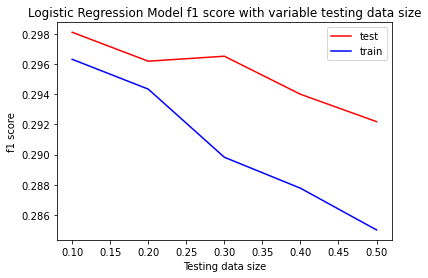

In [50]:
#varible test-data sizes
test_list=[0.1, 0.2, 0.3, 0.4, 0.5]
f1_train_list=[]
f1_test_list=[]
print("Calculating f1 score on various parameters : ")
for num in test_list:
    #split the dataset into train-test
    X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=num, random_state=1)

    #create a model object
    LR=LogisticRegression(multi_class='multinomial', random_state=1)   #train the model
    LR.fit(X_train,y_train)

    #make predictions
    LRPredict_train = LR.predict(X_train)
    LRPredict_test = LR.predict(X_test)
 
    #calculate the f1 score of the model
    f1_train=f1_score(y_train,LRPredict_train, average='macro')
    f1_test=f1_score(y_test,LRPredict_test, average='macro')
    
    f1_train_list.append(f1_train)
    f1_test_list.append(f1_test)    
    
    
    print("f1 score of the Logistic Regression  Model on train data at",num,": ",f1_train)
    print("f1 score of the Logistic Regression  Model on test data at",num,": ",f1_test)
    print("")

# plot the graph - f1 score against the test-data size
plt.plot(test_list, f1_train_list,'r') 
plt.plot(test_list, f1_test_list,'b') 
plt.xlabel('Testing data size') 
plt.ylabel('f1 score') 
plt.title('Logistic Regression Model f1 score with variable testing data size') 
plt.legend({'test','train'})
plt.show()

In [51]:
#split the data in the hightest f1 score
X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=0.1, random_state=1) # 90% training and 10% test
#train the model
LR_m =LogisticRegression(multi_class='multinomial', random_state=1)   #train the model


#train the model on the train data
LR_m.fit(X_train,y_train)

#make predictions
LRPredict_train_m = LR.predict(X_train)
LRPredict_test_m = LR.predict(X_test)

#calculate the f1 score of the model
f1_train=f1_score(y_train,LRPredict_train_m, average='macro')
f1_test=f1_score(y_test,LRPredict_test_m, average='macro')
   
#display f1 score
print("F1 score of the Logistic Regression Model on train data : ",round(f1_train,3))
print("F1 score of the Logistic Regression Model on test data : ",round(f1_test,3))

F1 score of the Logistic Regression Model on train data :  0.289
F1 score of the Logistic Regression Model on test data :  0.288


In [52]:
# confusion matrix for train data
matrix = confusion_matrix(y_train,LRPredict_train_m)
print(matrix)

[[ 4933    30     0     0     0     0     0]
 [  407 21735     0     0     0     3    63]
 [   10   331     0     0     0     0     0]
 [   10   197     0     0     0     0     1]
 [    2    28     0     0     0     0     0]
 [   18  1318     0     0     0     4     2]
 [    0  2093     0     0     0     0   197]]


In [53]:
# confusion matrix for test data
matrix = confusion_matrix(y_test,LRPredict_test_m)
print(matrix)

[[ 576    2    0    0    0    0    0]
 [  37 2379    0    0    0    0    8]
 [   0   39    0    0    0    0    0]
 [   0   19    0    0    0    0    0]
 [   0    2    0    0    0    0    0]
 [   0  181    0    0    0    0    0]
 [   0  224    0    0    0    0   20]]


## Using Weighted Average

Calculating f1 score on various parameters : 
f1 score of the Logistic Regression Model on train data at 0.1 :  0.8098531393135932
f1 score of the Logistic Regression Model on test data at 0.1 :  0.802565078351102

f1 score of the Logistic Regression Model on train data at 0.2 :  0.8089369241151856
f1 score of the Logistic Regression Model on test data at 0.2 :  0.8053105765150154

f1 score of the Logistic Regression Model on train data at 0.3 :  0.8098294276748558
f1 score of the Logistic Regression Model on test data at 0.3 :  0.8015164756077429

f1 score of the Logistic Regression Model on train data at 0.4 :  0.8089082062690377
f1 score of the Logistic Regression Model on test data at 0.4 :  0.800430316274728

f1 score of the Logistic Regression Model on train data at 0.5 :  0.8059785907937541
f1 score of the Logistic Regression Model on test data at 0.5 :  0.8009324384563429



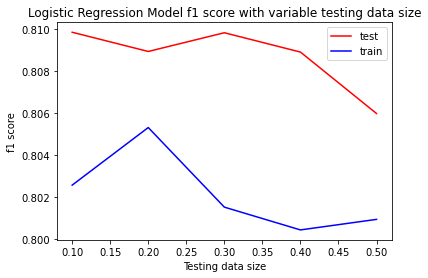

In [54]:
#varible test-data sizes
test_list=[0.1, 0.2, 0.3, 0.4, 0.5]
f1_train_list=[]
f1_test_list=[]
print("Calculating f1 score on various parameters : ")
for num in test_list:
    #split the dataset into train-test
    X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=num, random_state=1)

    #create a model object
    LR = LogisticRegression(multi_class='multinomial', random_state=1)
    #train the model
    LR.fit(X_train,y_train)

    #make predictions
    LRPredict_train = LR.predict(X_train)
    LRPredict_test = LR.predict(X_test)
 
    #calculate the accuracy of the model
    
    f1_train=f1_score(y_train,LRPredict_train, average='weighted')
    f1_test=f1_score(y_test,LRPredict_test, average='weighted')
    
    f1_train_list.append(f1_train)
    f1_test_list.append(f1_test)    
    
    
    print("f1 score of the Logistic Regression Model on train data at",num,": ",f1_train)
    print("f1 score of the Logistic Regression Model on test data at",num,": ",f1_test)
    print("")

# plot the graph - f1 score against the test-data size
plt.plot(test_list, f1_train_list,'r') 
plt.plot(test_list, f1_test_list,'b') 
plt.xlabel('Testing data size') 
plt.ylabel('f1 score') 
plt.title('Logistic Regression Model f1 score with variable testing data size') 
plt.legend({'test','train'})
plt.show()

In [55]:
#split the data in the hightest f1 score
X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=0.2, random_state=1) # 80% training and 20% test
#train the model
LR_w = LogisticRegression(multi_class='multinomial', random_state=1)

#train the model on the train data
LR_w.fit(X_train,y_train)

#make predictions
LRPredict_train_w = LR_w.predict(X_train)
LRPredict_test_w = LR_w.predict(X_test)

#calculate the f1 score of the model
f1_train=f1_score(y_train,LRPredict_train_w, average='weighted')
f1_test=f1_score(y_test,LRPredict_test_w, average='weighted')
   
#display f1 score
print("F1 score of the Logistic Regression Model on train data : ",round(f1_train,3))
print("F1 score of the Logistic Regression Model on test data : ",round(f1_test,3))

F1 score of the Logistic Regression Model on train data :  0.809
F1 score of the Logistic Regression Model on test data :  0.805


In [56]:
# confusion matrix for train data
matrix = confusion_matrix(y_train,LRPredict_train_w)
print(matrix)

[[ 4400     2     0     0     0     0     0]
 [  365 19305     0     0     0     3    73]
 [    7   288     0     0     0     0     0]
 [    9   169     0     0     0     0     2]
 [    2    21     0     0     0     0     0]
 [   16  1170     0     0     0     4     3]
 [    0  1816     0     0     0     0   240]]


In [57]:
# confusion matrix for test data
matrix = confusion_matrix(y_test,LRPredict_test_w)
print(matrix)

[[1139    0    0    0    0    0    0]
 [  84 4787    0    0    0    0   15]
 [   3   82    0    0    0    0    0]
 [   2   44    0    0    0    0    1]
 [   0    9    0    0    0    0    0]
 [   4  324    0    0    0    1    1]
 [   0  426    0    0    0    1   51]]


## Testing sample profiles on the trained models

In [58]:
sample=samples
samples

,Amount Requested,Interest Rate,Loan Length,Monthly PAYMENT,Status,Debt-To-Income Ratio,Remaining Principal,Payments To Date,Monthly Income,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization
35370,15000.0,14.61,36,517.13,0,18.20,-0.00,17721.02,6791.67,7.0,29.0,80237.0,93.2
35371,9800.0,13.22,36,331.25,5,13.06,7457.40,3306.60,2916.67,6.0,28.0,5088.0,45.4
35372,10000.0,16.00,36,351.58,5,16.99,8882.07,1753.55,6916.67,5.0,19.0,4723.0,94.5
35373,12000.0,13.92,36,409.65,1,23.26,5618.26,8591.52,12083.33,11.0,27.0,141967.0,95.5
35374,9500.0,15.65,36,332.37,1,18.72,4511.88,6965.28,3750.00,13.0,22.0,7888.0,59.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2500.0,14.83,60,59.26,1,18.49,2263.71,472.72,5560.00,8.0,32.0,597.0,6.9
36392,5000.0,15.20,36,173.82,1,15.71,4079.63,1384.96,3500.00,4.0,5.0,1191.0,85.1
36393,3500.0,15.57,60,84.32,1,11.62,3174.50,674.00,5541.67,10.0,28.0,30191.0,78.0
36394,20000.0,19.66,60,526.11,1,13.39,18094.26,4427.86,10583.33,6.0,39.0,16641.0,80.8


In [59]:
#get the sample output separated
sample_y=samples['Status']
sample_y.head(5)

35370    0
35371    5
35372    5
35373    1
35374    1
Name: Status, dtype: int64

In [60]:
#remove the status attribute from the sample profiles
samples = samples.drop('Status', axis=1)

In [61]:
trans_others = scaler.transform(samples)
#create the dataset consisting of the predictor variables
samples = pd.DataFrame(data=trans_others, columns=samples.columns.values)

In [62]:
#make predictions on unseen data
prediction = LR_m.predict(samples)

In [63]:
#Accuracy of the model on unseen data
Accuracy = metrics.accuracy_score(sample_y,prediction)
Accuracy 

0.854

In [64]:
#F1 score of the model on unseen data using macro average
f1_sample=f1_score(sample_y,prediction, average='macro')
f1_sample

0.3197542828987663

In [65]:
prediction = LR_w.predict(samples)

In [66]:
#F1 score of the model on unseen data using weighted average
f1_sample=f1_score(sample_y,prediction, average='weighted')
f1_sample

0.7912440993181651

In [67]:
matrix = confusion_matrix(sample_y,prediction)
print(matrix)

[[143   0   0   0   0   0]
 [  2 711   0   0   0   0]
 [  0  41   0   0   0   0]
 [  1  13   0   0   0   1]
 [  0   7   0   0   0   0]
 [  1  79   0   0   0   1]]


In [68]:
sample = sample[(sample['Status']==0) | (sample['Status']==1)]
sample  

,Amount Requested,Interest Rate,Loan Length,Monthly PAYMENT,Status,Debt-To-Income Ratio,Remaining Principal,Payments To Date,Monthly Income,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization
35370,15000.0,14.61,36,517.13,0,18.20,-0.00,17721.02,6791.67,7.0,29.0,80237.0,93.2
35373,12000.0,13.92,36,409.65,1,23.26,5618.26,8591.52,12083.33,11.0,27.0,141967.0,95.5
35374,9500.0,15.65,36,332.37,1,18.72,4511.88,6965.28,3750.00,13.0,22.0,7888.0,59.8
35377,25000.0,17.74,36,900.53,1,15.12,12040.39,18904.41,23750.00,17.0,28.0,165867.0,81.1
35378,9600.0,12.87,36,322.88,1,15.38,4455.57,6775.23,4512.50,4.0,13.0,168334.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2500.0,14.83,60,59.26,1,18.49,2263.71,472.72,5560.00,8.0,32.0,597.0,6.9
36392,5000.0,15.20,36,173.82,1,15.71,4079.63,1384.96,3500.00,4.0,5.0,1191.0,85.1
36393,3500.0,15.57,60,84.32,1,11.62,3174.50,674.00,5541.67,10.0,28.0,30191.0,78.0
36394,20000.0,19.66,60,526.11,1,13.39,18094.26,4427.86,10583.33,6.0,39.0,16641.0,80.8


In [69]:
#get the sample output separated
sample_yy=sample['Status']
sample_yy.head(5)

35370    0
35373    1
35374    1
35377    1
35378    1
Name: Status, dtype: int64

In [70]:
#remove the status attribute from the sample profiles
sample = sample.drop('Status', axis=1)

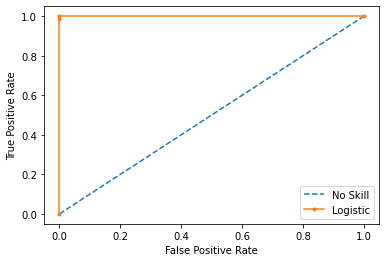

In [71]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

trainX, testX, trainy, testy = train_test_split(sample, sample_yy, test_size=0.1, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()